# Import File Dataset in Kaggle

In [ ]:
# Ambil dataset dari kaggle di collab

from google.colab import files
!pip install -q kaggle # Install Kaggle
files.upload() # Upload file kaggle.json
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d merishnasuwal/breast-cancer-prediction-dataset  # Download dataset dari Kaggle

In [4]:
!unzip breast-cancer-prediction-dataset.zip # ekstrak file zip

Archive:  breast-cancer-prediction-dataset.zip
  inflating: Breast_cancer_data.csv  


# About Dataset

Di seluruh dunia, kanker payudara adalah jenis kanker yang paling umum pada wanita dan tertinggi kedua dalam hal angka kematian. Diagnosis kanker payudara dilakukan ketika ditemukan benjolan abnormal (dari pemeriksaan sendiri atau x-ray) atau setitik kecil dari kalsium terlihat (pada x-ray). Setelah benjolan yang mencurigakan ditemukan, dokter akan melakukan diagnosis untuk menentukan apakah itu kanker dan, jika ya, apakah sudah menyebar ke bagian tubuh lainnya.

Dataset kanker payudara ini diperoleh dari University of Wisconsin Hospitals, Madison dari Dr. William H. Wolberg.

Link: https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset

# Import Library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import Dataset

In [6]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [8]:
df.shape

(569, 6)

In [9]:
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

# Mini EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [12]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [10]:
# Missing Value
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

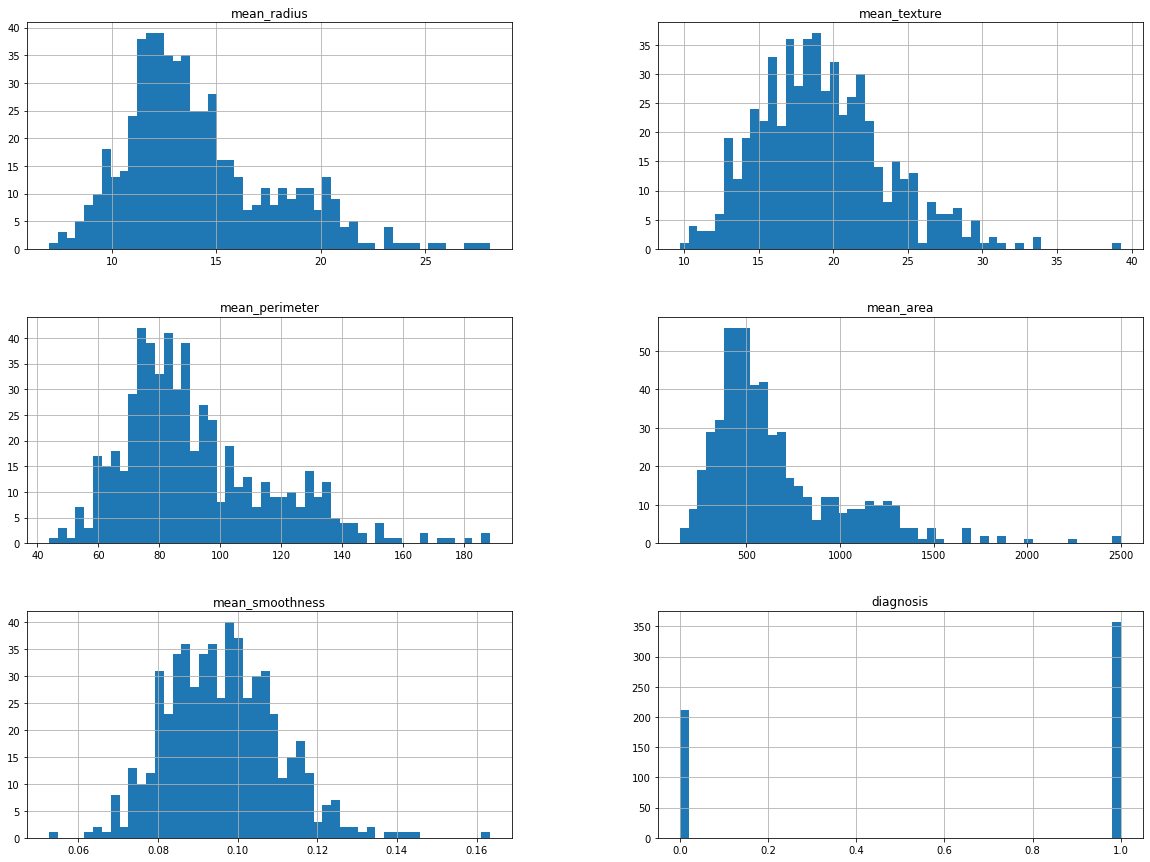

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

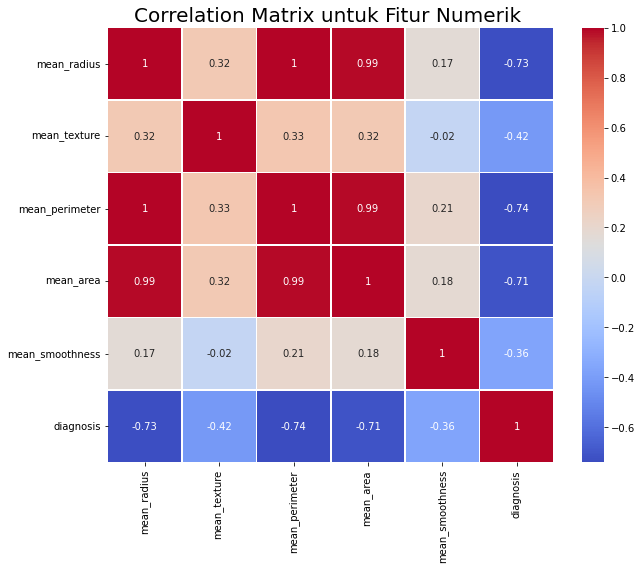

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(["diagnosis"],axis =1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state = 42)

In [16]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 569
Total # of sample in train dataset: 512
Total # of sample in test dataset: 57


# Modeling

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
print('Accuracy Training: {:.2f} %'.format(rfc.score(X_train, y_train)*100))
print('Accuracy Testing: {:.2f} %'.format(rfc.score(X_test, y_test)*100))

Accuracy Training: 100.00 %
Accuracy Testing: 96.49 %


## SVC

In [39]:
from sklearn.svm import SVC
svc = SVC(gamma='scale', kernel='rbf', C=2)
svc.fit(X_train, y_train)

SVC(C=2)

In [40]:
print('Accuracy Training: {:.2f} %'.format(svc.score(X_train, y_train)*100))
print('Accuracy Testing: {:.2f} %'.format(svc.score(X_test, y_test)*100))

Accuracy Training: 89.45 %
Accuracy Testing: 89.47 %


## XGBoost

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [42]:
print('Accuracy Training: {:.2f} %'.format(xgb.score(X_train, y_train)*100))
print('Accuracy Testing: {:.2f} %'.format(xgb.score(X_test, y_test)*100))

Accuracy Training: 97.46 %
Accuracy Testing: 96.49 %


# Evaluate

## Evaluate Random Forest

[[20  1]
 [ 1 35]]


0.9649122807017544

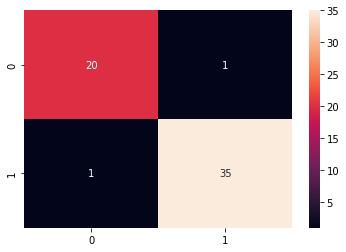

In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
accuracy_score(y_test, y_pred)

In [44]:
# Precision Recall F1-Score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred, average=None)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



array([0.95238095, 0.97222222])

## Evaluate SVC

[[16  5]
 [ 1 35]]


0.8947368421052632

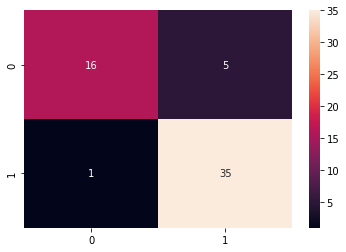

In [46]:
# Confusion Matrix
y_pred2 = svc.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
sns.heatmap(cm2, annot=True)
accuracy_score(y_test, y_pred2)

In [47]:
# Precision Recall F1-Score
print(classification_report(y_test, y_pred2))
f1_score(y_test, y_pred2, average=None)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.88      0.97      0.92        36

    accuracy                           0.89        57
   macro avg       0.91      0.87      0.88        57
weighted avg       0.90      0.89      0.89        57



array([0.84210526, 0.92105263])

## Evaluate XGBoost

[[20  1]
 [ 1 35]]


0.9649122807017544

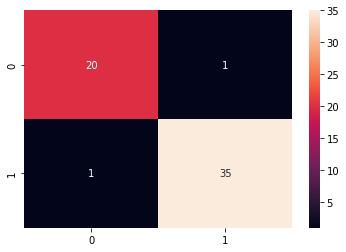

In [48]:
# Confusion Matrix
y_pred3 = xgb.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
sns.heatmap(cm3, annot=True)
accuracy_score(y_test, y_pred3)

# K-Fold Cross Validation

Hanya dua model yang akan di cek, yaitu XGBoost dan Random Forest

In [49]:
# Random Forest Classifier
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.19 %
Standard Deviation: 2.44 %


In [50]:
# XGBoost
accuracies2 = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy: 92.00 %
Standard Deviation: 1.19 %


Dari hasil di atas Algoritma yang akan di pilih adalah XGBoost

# Save Model

In [52]:
import pickle
filename = 'breast_cancer.pkl'
pickle.dump(xgb, open(filename, 'wb'))

# Load Model

In [53]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Accuracy: {:.2f} %'.format(result*100))

Accuracy: 96.49 %
